In [2]:
import pandas as pd
from datetime import datetime

## Creating a Reddit API Client with PRAW

In [ ]:
import praw

#User Agent Definition
user_agent = "nvda 1.0 by u/Interesting-Thing302"

#Reddit API Client Initialization
reddit=praw.Reddit(
    client_id='-Eii7F5tVZEYTB9_xuwUUA',
    client_secret='lYSjyUDDlGRpRwwG-gaLZ8Fj05BLXA',
    user_agent=user_agent
)

## Extracting Reddit Comments Related to NVDA/Nvidia/NVIDIA

In [ ]:
#Search Query and Date Range Setup
search_query = "NVDA|Nvidia|NVIDIA"

start_date=datetime(2023,1,1)
end_date=datetime(2024,6,24)

#Lists to Store Comment Data
comments_text=[]
comments_created_time=[]
comments_scores=[]

#Searching and Collecting Comments
for submission in reddit.subreddit('all').search(search_query, limit=None):
    
    submission.comments.replace_more(limit=None)
    
    for comment in submission.comments.list():
        
        comment_time=datetime.utcfromtimestamp(comment.created_utc)
        
        if start_date<=comment_time<=end_date:
            comments_text.append(comment.body)
            comments_created_time.append(comment_time.strftime('%Y-%m-%d'))
            comments_scores.append(comment.score)

#Creating a Pandas DataFrame
nvda_reddit_df=pd.DataFrame({
    'comment':comments_text,
    'created_time':comments_created_time,
    'score':comments_scores
})    

In [ ]:
nvda_reddit_df

## Sorting Reddit Comments DataFrame by Creation Time

In [ ]:
#Convert 'created_time' to datetime for accurate sorting
nvda_reddit_df['created_time']=pd.to_datetime(nvda_reddit_df['created_time'])

#Sort DataFrame by 'created_time'
nvda_reddit_df=nvda_reddit_df.sort_values(by='created_time')

#Reset index after sorting
nvda_reddit_df.reset_index(drop=True, inplace=True)

In [ ]:
#Run the dataframe
nvda_reddit_df

In [ ]:
#Save NVDA reddit data to CSV
nvda_reddit_df.to_csv("nvda_reddit_df.csv", index=False)

In [3]:
nvda_comment_df=pd.read_csv("nvda_reddit_df.csv")
nvda_comment_df

,comment,created_time,score
0,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,2023-05-29,1
1,I hope he continues to call it a Loser,2023-05-29,1
2,I read the prospectus of it and I got that sen...,2023-05-29,3
3,same,2023-05-29,1
4,"He said he is short nvidia, not to short nvidi...",2023-05-29,336
...,...,...,...
6824,How is it a 'shill'? Do you know the definiti...,2024-06-23,1
6825,Ok shill,2024-06-23,1
6826,You can doubt something and pick a better inve...,2024-06-23,1
6827,🤫,2024-06-23,1


# Sentiment Analysis of NVDA on Reddit Discussion

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

#Function to classify sentiment
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
    
#Apply sentiment analysis

nvda_comment_df['sentiment']=nvda_comment_df['comment'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

nvda_comment_df['sentiment']=nvda_comment_df['sentiment'].apply(classify_sentiment)

In [6]:
nvda_comment_df

,comment,created_time,score,sentiment
0,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,2023-05-29,1,positive
1,I hope he continues to call it a Loser,2023-05-29,1,negative
2,I read the prospectus of it and I got that sen...,2023-05-29,3,negative
3,same,2023-05-29,1,neutral
4,"He said he is short nvidia, not to short nvidi...",2023-05-29,336,neutral
...,...,...,...,...
6824,How is it a 'shill'? Do you know the definiti...,2024-06-23,1,neutral
6825,Ok shill,2024-06-23,1,positive
6826,You can doubt something and pick a better inve...,2024-06-23,1,negative
6827,🤫,2024-06-23,1,neutral


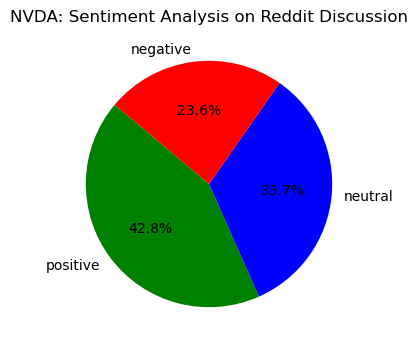

In [7]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = nvda_comment_df['sentiment'].value_counts()

colors=['green','blue','red']
colors_map={'positive':'green', 'neutral': 'blue', 'negative':'red'}
colors_pie= [colors_map[sentiment] for sentiment  in sentiment_counts.index]


# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors_pie)
plt.title('NVDA: Sentiment Analysis on Reddit Discussion')
plt.show()

In [8]:
nvda_comment_df['date']=pd.to_datetime(nvda_comment_df['created_time'])

In [9]:
nvda_comment_df

,comment,created_time,score,sentiment,date
0,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,2023-05-29,1,positive,2023-05-29
1,I hope he continues to call it a Loser,2023-05-29,1,negative,2023-05-29
2,I read the prospectus of it and I got that sen...,2023-05-29,3,negative,2023-05-29
3,same,2023-05-29,1,neutral,2023-05-29
4,"He said he is short nvidia, not to short nvidi...",2023-05-29,336,neutral,2023-05-29
...,...,...,...,...,...
6824,How is it a 'shill'? Do you know the definiti...,2024-06-23,1,neutral,2024-06-23
6825,Ok shill,2024-06-23,1,positive,2024-06-23
6826,You can doubt something and pick a better inve...,2024-06-23,1,negative,2024-06-23
6827,🤫,2024-06-23,1,neutral,2024-06-23


## Aggregating Sentiment Scores by Date

In [10]:
# Aggregate sentiment scores by date
nvda_sentiment= nvda_comment_df.groupby('date').agg(
{
    'score':'sum',
    'sentiment': lambda x: x.value_counts().idxmax()
}).reset_index()

# Rename the date column to match the stock DataFrame

nvda_sentiment.rename(columns={'date': 'Date'}, inplace=True)

In [11]:
nvda_sentiment

,Date,score,sentiment
0,2023-05-29,4195,neutral
1,2023-05-30,398,neutral
2,2023-05-31,19,positive
3,2023-06-01,5,positive
4,2023-06-02,2,positive
...,...,...,...
151,2024-06-19,960,positive
152,2024-06-20,260,positive
153,2024-06-21,4999,neutral
154,2024-06-22,45,positive


In [12]:
#Save NVDA sentiment to CSV
nvda_sentiment.to_csv("nvda_sentiment.csv", index=False)

# Topic Modelling on Reddit Discussion on NVDA

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

## Preprocessing Reddit Comments Using NLTK

In [14]:
#Download required NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

#Initialize stopwords and stemmer
stop_words=set(stopwords.words('english'))
stemmer=PorterStemmer()

#Preprocssing function
def preprocess_text(text):
    
    #Tokenization
    tokens=word_tokenize(text.lower())
    
    #Stop-word removal
    filter_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
    #Stemming
    stemmed_tokens = [stemmer.stem(word) for word in filter_tokens]
    return ' '.join(stemmed_tokens)

#Apply proprocessing
nvda_comment_df['processed_comment']=nvda_comment_df['comment'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /Users/sailone/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sailone/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
nvda_comment_df

,comment,created_time,score,sentiment,date,processed_comment
0,\n**User Report**| | | |\n:--|:--|:--|:--\n**T...,2023-05-29,1,positive,2023-05-29,user report total submiss first seen wsb year ...
1,I hope he continues to call it a Loser,2023-05-29,1,negative,2023-05-29,hope continu call loser
2,I read the prospectus of it and I got that sen...,2023-05-29,3,negative,2023-05-29,read prospectu got sens well probabl reason lo...
3,same,2023-05-29,1,neutral,2023-05-29,
4,"He said he is short nvidia, not to short nvidi...",2023-05-29,336,neutral,2023-05-29,said short nvidia short nvidia two differ thing
...,...,...,...,...,...,...
6824,How is it a 'shill'? Do you know the definiti...,2024-06-23,1,neutral,2024-06-23,know definit trade
6825,Ok shill,2024-06-23,1,positive,2024-06-23,ok shill
6826,You can doubt something and pick a better inve...,2024-06-23,1,negative,2024-06-23,doubt someth pick better invest short everyth ...
6827,🤫,2024-06-23,1,neutral,2024-06-23,


In [17]:
# Define date ranges
part_1_start = '2024-01-01'
part_1_end = '2024-06-30'

# Filter data for each part
part_1_df = nvda_comment_df[(nvda_comment_df['date'] >= part_1_start) & (nvda_comment_df['date'] < part_1_end)]

# Reset index for each dataframe if needed
part_1_df = part_1_df.reset_index(drop=True)

In [18]:
part_1_df

,comment,created_time,score,sentiment,date,processed_comment
0,Tommy Tuberville picks are also solid plays.,2024-01-01,2,positive,2024-01-01,tommi tubervil pick also solid play
1,"I hate her, but I’m buying nvidia. Might as we...",2024-01-01,1,positive,2024-01-01,hate buy nvidia might well make money
2,"As the speaker of the house, she was the perso...",2024-01-01,1,neutral,2024-01-01,speaker hous person defend right insid trade
3,There are a bunch of others and I don’t think ...,2024-01-02,1,positive,2024-01-02,bunch other think pelosi top one caveat believ...
4,You have less ability to think critically than...,2024-01-02,1,positive,2024-01-02,less abil think critic year old son lmao cult ...
...,...,...,...,...,...,...
4703,How is it a 'shill'? Do you know the definiti...,2024-06-23,1,neutral,2024-06-23,know definit trade
4704,Ok shill,2024-06-23,1,positive,2024-06-23,ok shill
4705,You can doubt something and pick a better inve...,2024-06-23,1,negative,2024-06-23,doubt someth pick better invest short everyth ...
4706,🤫,2024-06-23,1,neutral,2024-06-23,


## Topic Modeling and Visualization Using LDA

In [19]:
# Import necessary libraries
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import gensim
import gensim.corpora as corpora

/Users/sailone/anaconda3/lib/python3.11/site-packages/botocore/utils.py:15: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  import cgi
/Users/sailone/anaconda3/lib/python3.11/site-packages/botocore/httpsession.py:41: DeprecationWarning: 'urllib3.contrib.pyopenssl' module is deprecated and will be removed in a future release of urllib3 2.x. Read more in this issue: https://github.com/urllib3/urllib3/issues/2680
  from urllib3.contrib.pyopenssl import orig_util_SSLContext as SSLContext


In [21]:
# Extract the processed comments
documents_1 = part_1_df['processed_comment'].tolist()

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
vectorized_data = vectorizer.fit_transform(documents_1)

# Fit the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust n_components as needed
lda_model.fit(vectorized_data)

# Convert the data to the format that gensim expects
corpus = gensim.matutils.Sparse2Corpus(vectorized_data, documents_columns=False)
id2word = corpora.Dictionary.from_corpus(corpus, id2word=dict((i, s) for i, s in enumerate(vectorizer.get_feature_names_out())))

# Create the gensim LDA model equivalent
gensim_lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=5,
    passes=10,
    random_state=42
)

# Prepare the LDA visualization
pyLDAvis.enable_notebook()
panel = gensimvis.prepare(gensim_lda_model, corpus, id2word)

# Display the LDA visualization
pyLDAvis.display(panel)
